In [9]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import forecast  # Импортируем файл с функцией прогноза

In [10]:
df = forecast.get_df('BTCUSD', '2024-01-02 00:03', '1T')

In [11]:
df

,open,high,low,close,volume
timestamp,,,,,
2023-05-01 00:00:00,29237.5,29259.0,29237.0,29257.5,1007238.0
2023-05-01 00:01:00,29257.5,29293.5,29257.0,29280.5,1084034.0
2023-05-01 00:02:00,29282.0,29282.0,29222.5,29223.0,513475.0
2023-05-01 00:03:00,29222.5,29274.0,29220.0,29273.5,256680.0
2023-05-01 00:04:00,29274.0,29299.0,29273.5,29298.5,619150.0
...,...,...,...,...,...
2024-05-29 23:55:00,67627.0,67627.5,67616.0,67616.0,33789.0
2024-05-29 23:56:00,67616.0,67616.0,67616.0,67616.0,0.0
2024-05-29 23:57:00,67616.0,67616.0,67596.5,67614.5,75228.0


In [12]:
start_date = '2024-01-01'
end_date = '2024-12-31'

In [13]:
def run_backtest(df, start_date, end_date, max_forecasts=10):
    # Фильтруем данные по заданным датам
    df = df[start_date:end_date]
    
    # Начальные параметры
    min_bars_for_forecast = 300
    forecast_high = 0
    forecast_low = 0
    forecast_count = 0

    for i, current_time in enumerate(df.index):
        # Пропускаем первые 300 баров
        if i < min_bars_for_forecast:
            continue
        
        # Проверяем, достигнуто ли максимальное количество прогнозов
        if forecast_count >= max_forecasts:
            print(f'Maximum number of forecasts ({max_forecasts}) reached.')
            break

        # если мы еще не получали предсказания или цена вышла за диапозон предыдущего предсказания.
        if forecast_high == 0 \
            or df.loc[current_time, 'high'] > forecast_high \
            or df.loc[current_time, 'low'] < forecast_low:
            # Вызываем функцию прогноза
            forecast_data = forecast.get_forecast('BTCUSD', current_time.strftime('%Y-%m-%d %H:%M'))

            # Увеличиваем счетчик прогнозов
            forecast_count += 1

            # Получаем прогнозируемые значения
            forecast_high = forecast_data['h']
            forecast_low = forecast_data['l']

    print('Backtest completed.')

Reading 1T data for 2024-01-01 05:00...
Creating chart image...
Saving img/1T.png...
Requesting analysis...
Saved response to api_responses_1/BTCUSD/2024-01-01_05:00__2024-06-02_18-16-46__183753.json
Saved response markdown to api_responses_1_md/BTCUSD/2024-01-01_05:00__2024-06-02_18-16-46__183753.md
Requesting json...
Saved response to api_responses_2/BTCUSD/2024-01-01_05:00__2024-06-02_18-16-47__183753.json
Forecast:
time                     high            low             p_up    p_down  conf     created_at           error
2024-01-01 05:00  	 42550  	 42450  	 60  	 40  	 7  	  2024-06-02 18:16:32
Saving forecast into forecasts/BTCUSD.csv...
Прогноз успешно добавлен в файл forecasts/BTCUSD.csv
Reading 1T data for 2024-01-01 05:01...
Creating chart image...
Saving img/1T.png...
Requesting analysis...
Saved response to api_responses_1/BTCUSD/2024-01-01_05:01__2024-06-02_18-17-03__183753.json
Saved response markdown to api_responses_1_md/BTCUSD/2024-01-01_05:01__2024-06-02_18-17-03__18

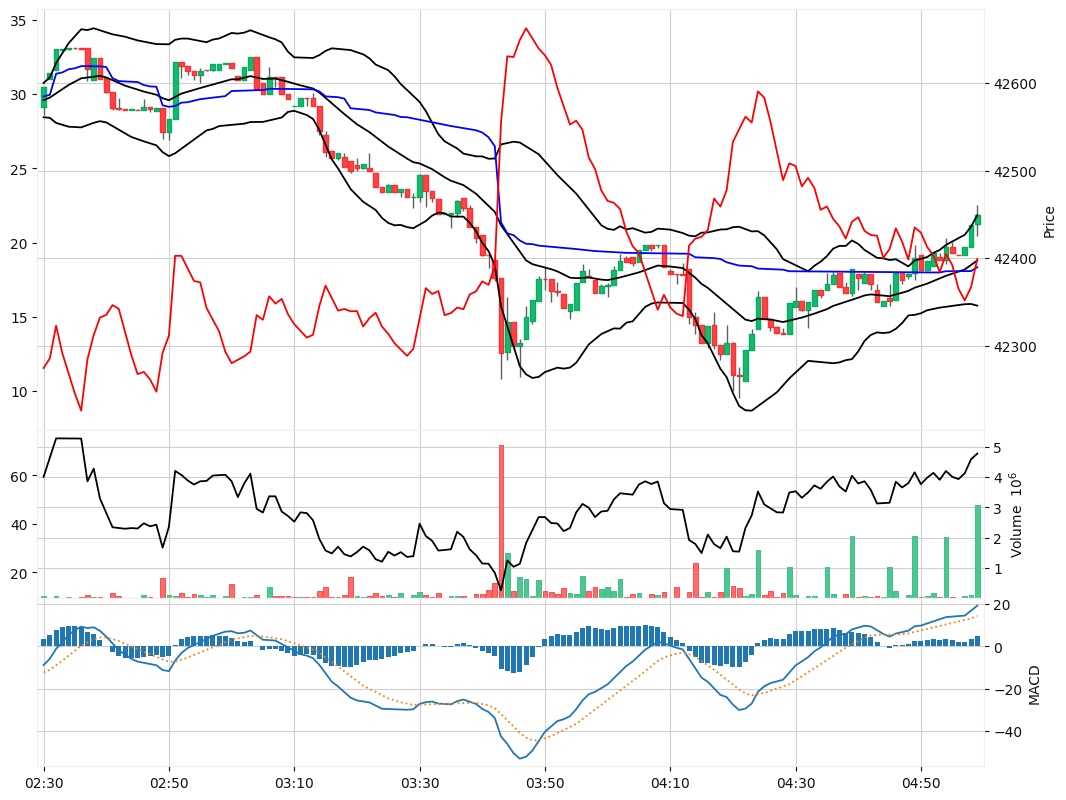

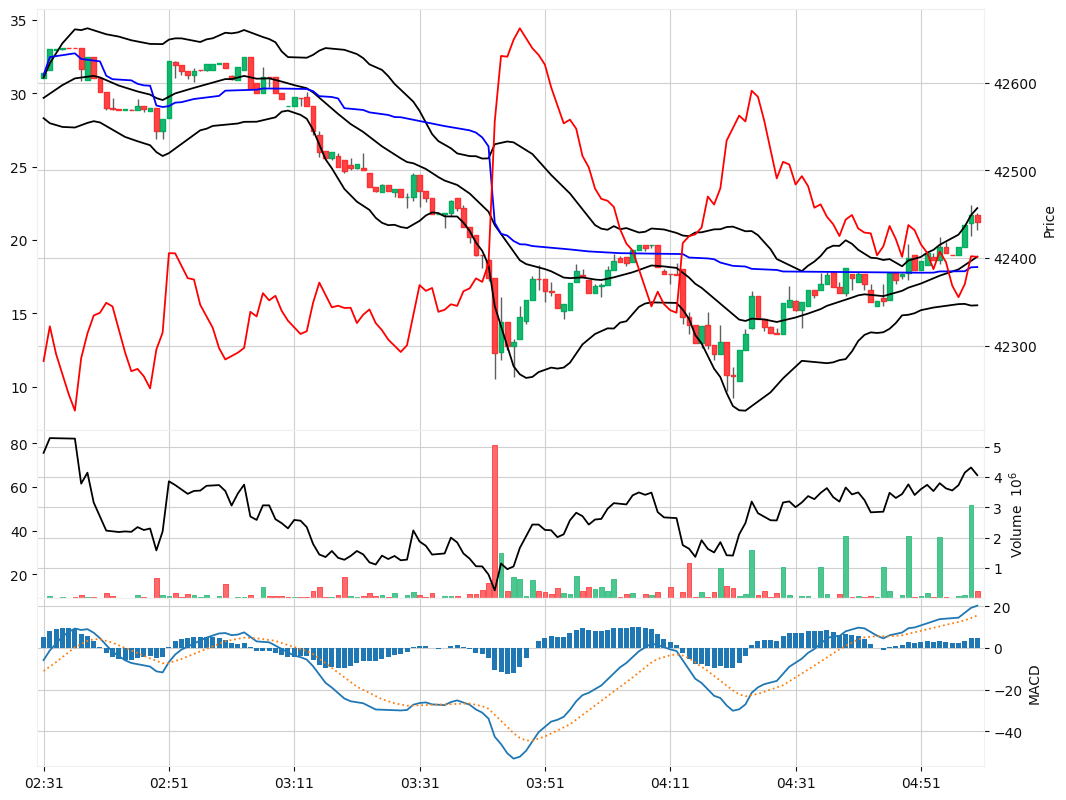

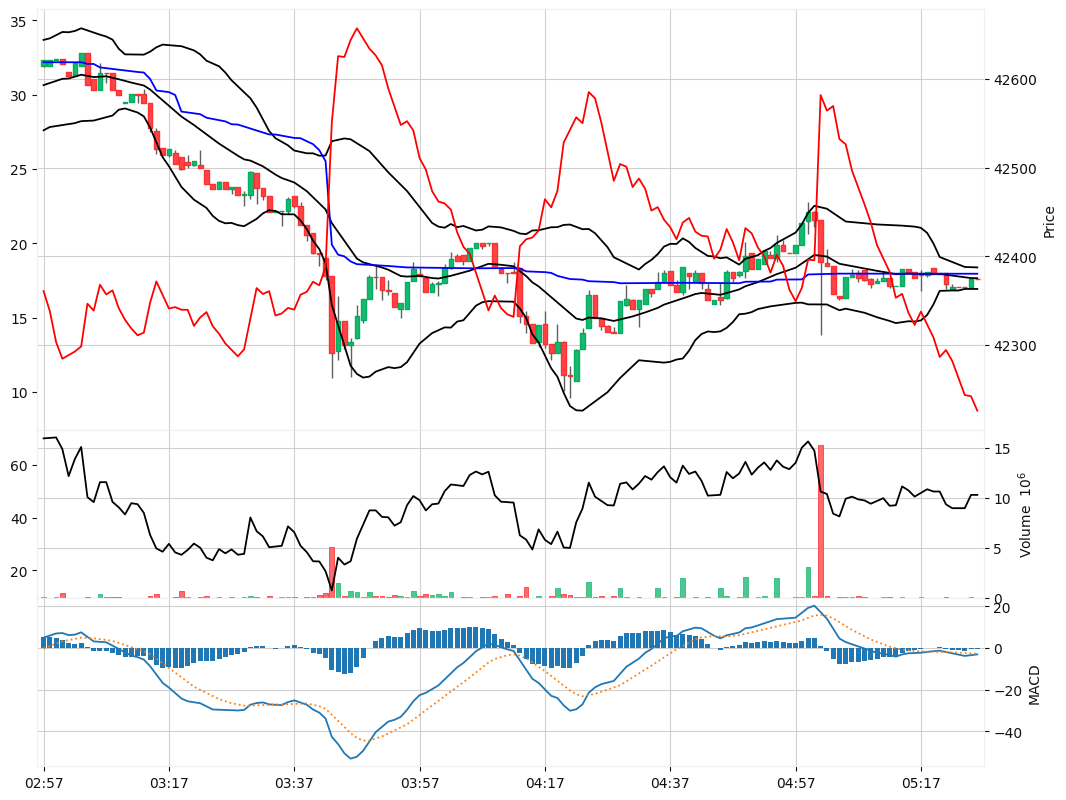

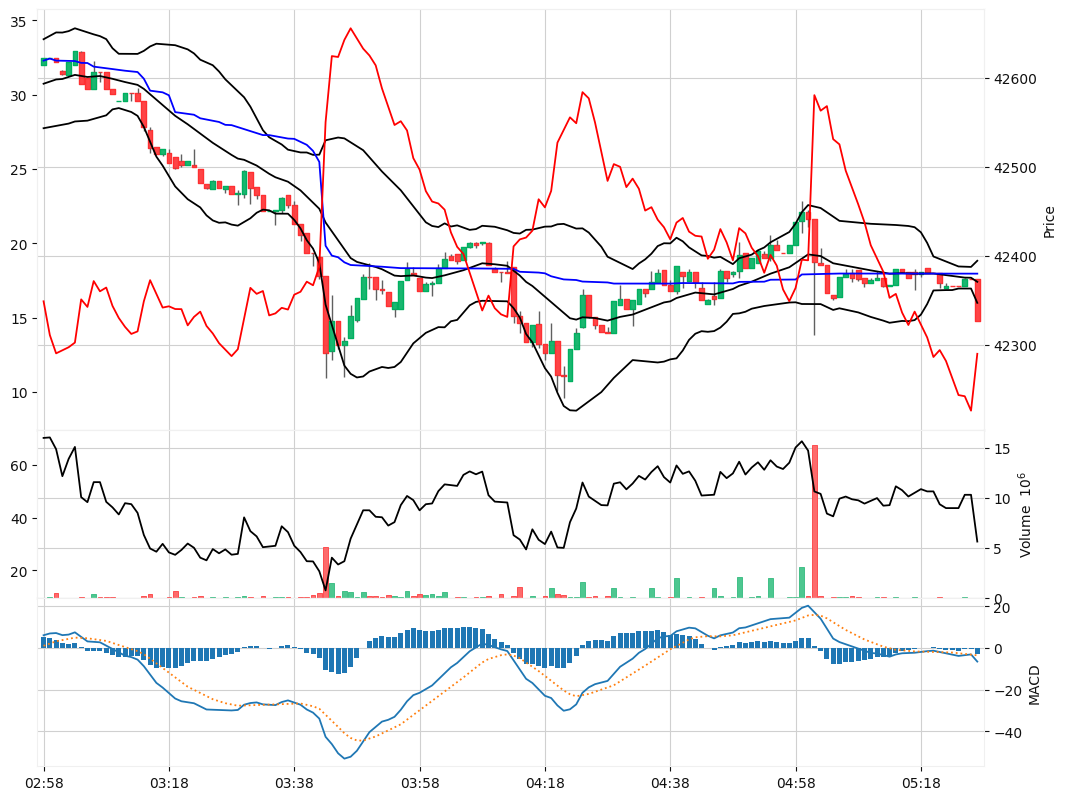

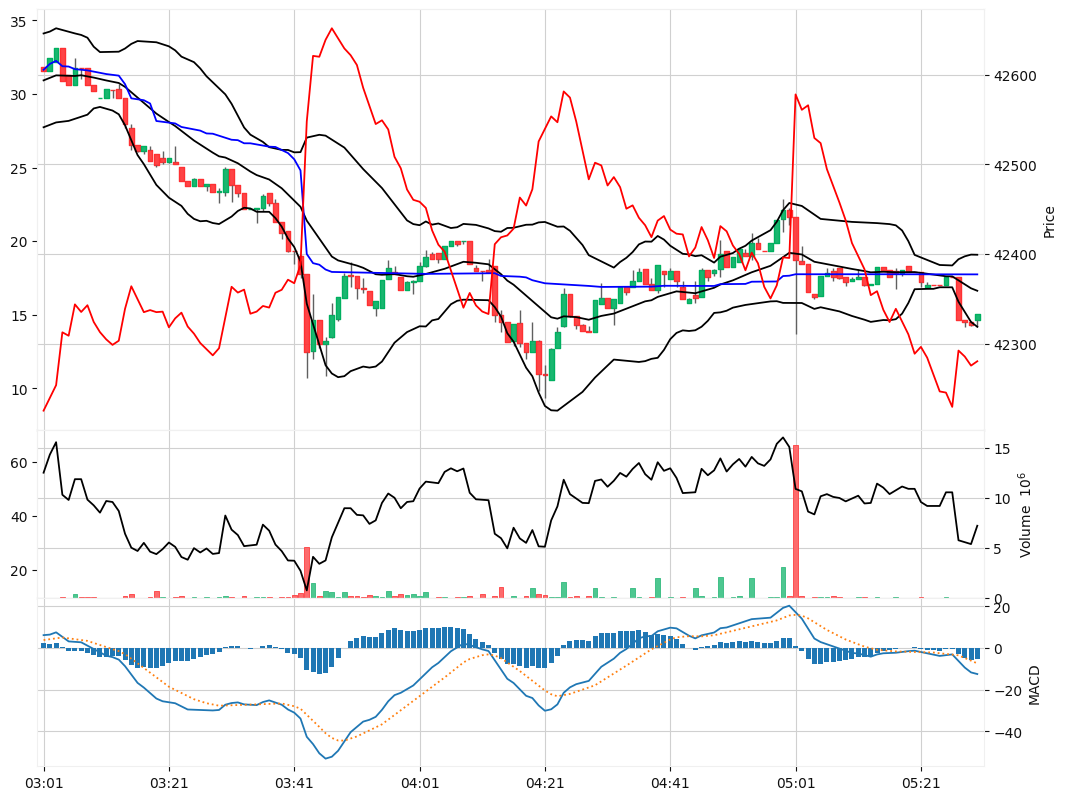

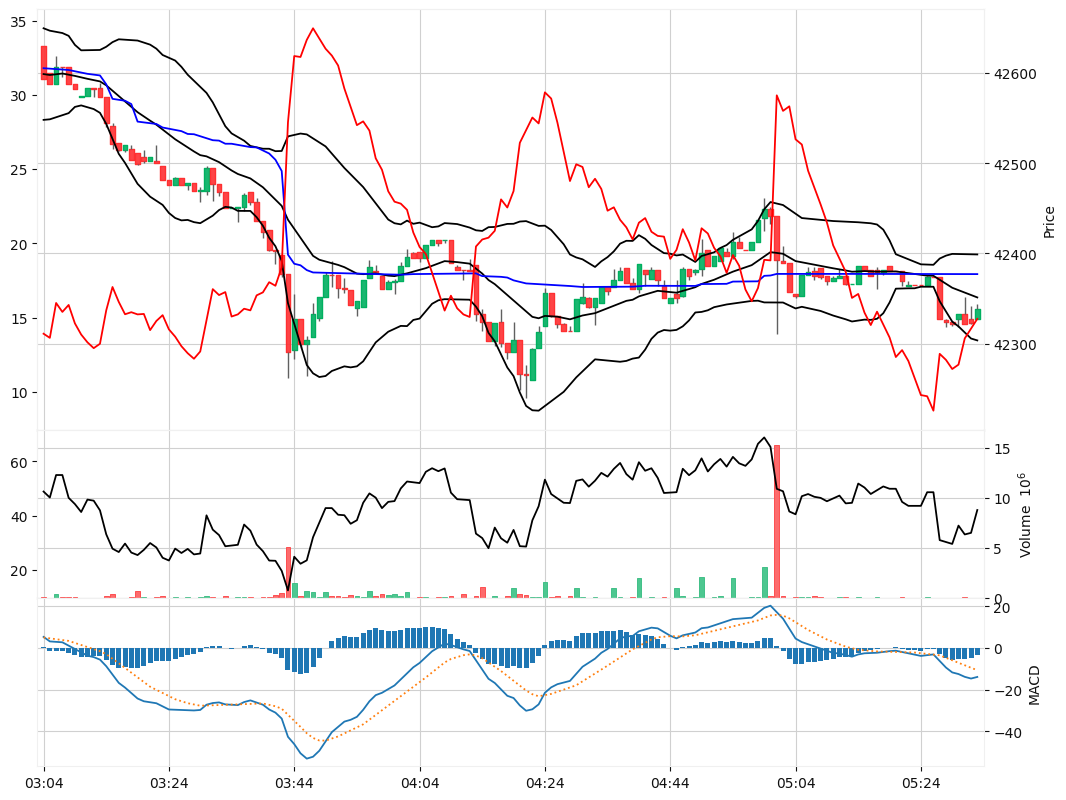

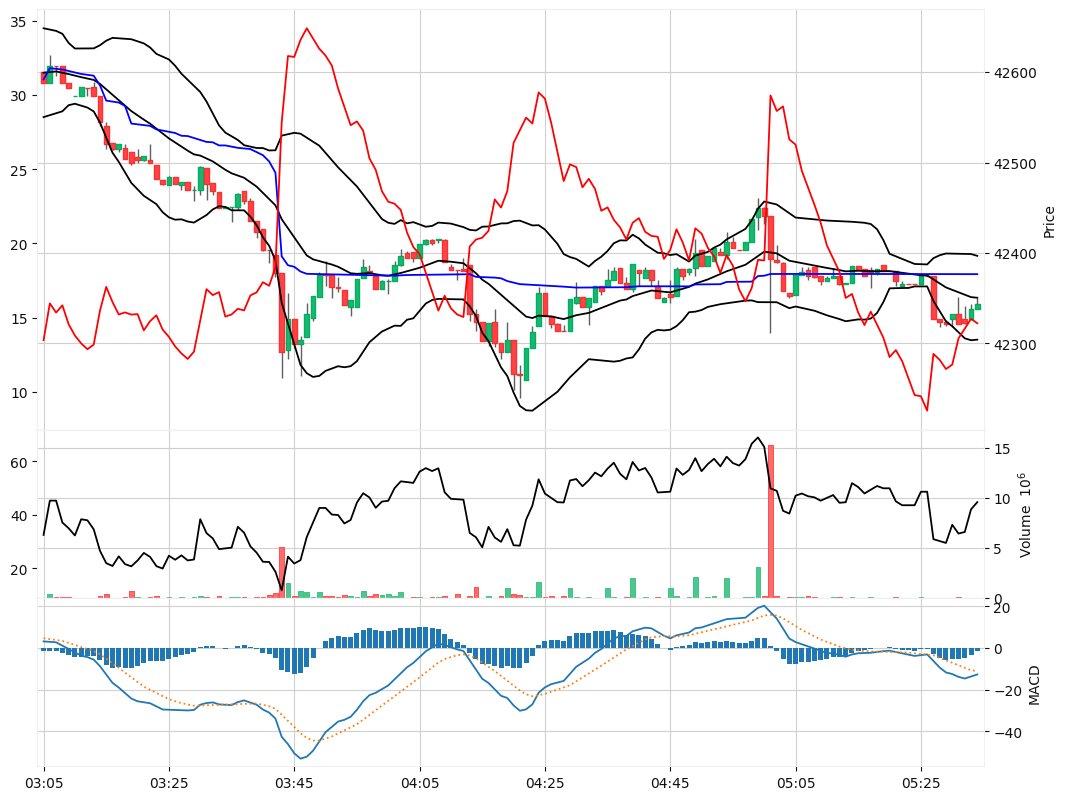

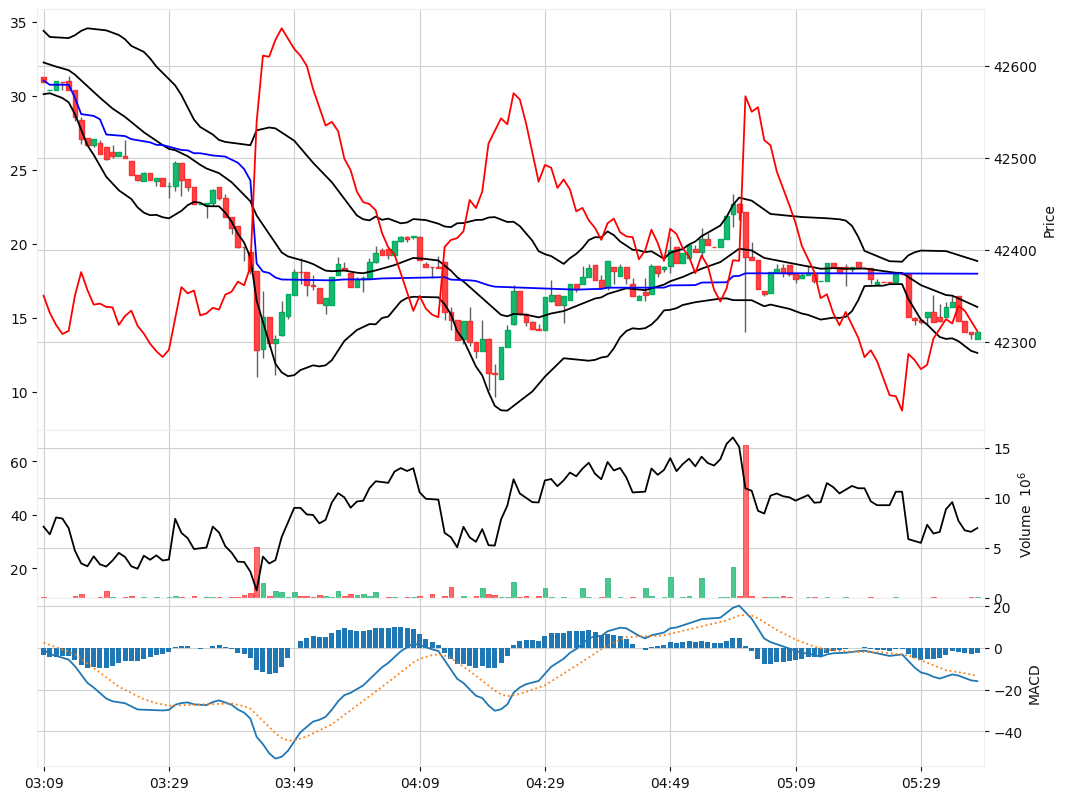

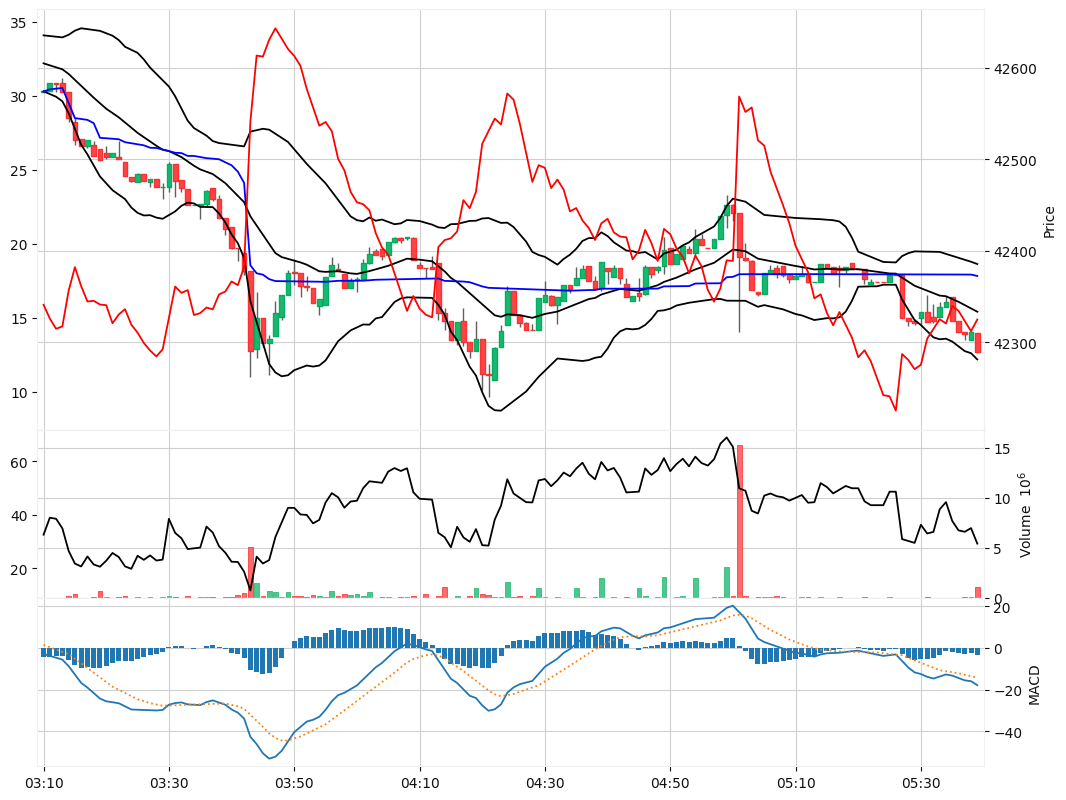

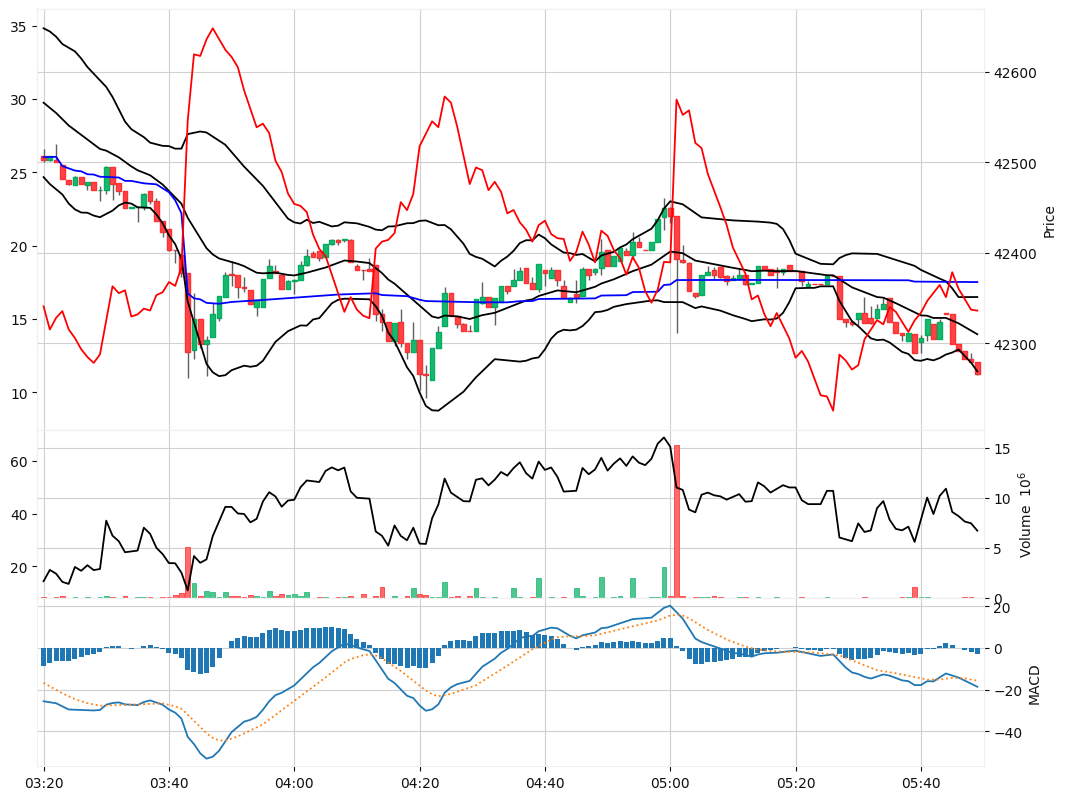

In [14]:
# Запускаем бэктест
run_backtest(df, start_date, end_date)